**Imports**

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")

**Data Read-In**

In [2]:
legos = pd.read_csv('../data/lego_pieces.csv')

In [3]:
legos.head()

,inventory_id,part_num,color_id,quantity,is_spare,part_name,part_cat_id,part_cat_name,color_name,color_rgb,color_trans,invt_version,invt_set_num,set_name,set_year,set_theme,total_set_parts,set_theme_name,set_theme_parentid
0,1,48379c01,72,1,f,Sports Promo Figure Base with Feet,27.0,Minifig Accessories,Dark Bluish Gray,6C6E68,f,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,Gravity Games,458.0
1,1,48395,7,1,f,Sports Promo Snowboard from McDonald's Sports ...,27.0,Minifig Accessories,Light Gray,9BA19D,f,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,Gravity Games,458.0
2,1,mcsport6,25,1,f,Sports Promo Figure Head Torso Assembly McDona...,13.0,Minifigs,Orange,FE8A18,f,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,Gravity Games,458.0
3,1,paddle,0,1,f,Sports Promo Paddle from McDonald's Sports Sets,27.0,Minifig Accessories,Black,05131D,f,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,Gravity Games,458.0
4,3,11816pr0005,78,1,f,"Minifig Head Modified - Friends - Green Eyes, ...",13.0,Minifigs,Light Flesh,F6D7B3,f,1,3931-1,Emma's Splash Pool,2012,494,43,Friends,0.0


In [4]:
legos.tail()

,inventory_id,part_num,color_id,quantity,is_spare,part_name,part_cat_id,part_cat_name,color_name,color_rgb,color_trans,invt_version,invt_set_num,set_name,set_year,set_theme,total_set_parts,set_theme_name,set_theme_parentid
580246,18708,99206,0,3,f,Plate Special 2 x 2 x 0.667 with Two Studs On ...,9.0,Plates Special,Black,05131D,f,1,75090-2,Ezra's Speeder Bike,2015,182,253,Star Wars Rebels,158.0
580247,18708,99207,71,4,f,Bracket 1 x 2 - 2 x 2 Inverted,9.0,Plates Special,Light Bluish Gray,A0A5A9,f,1,75090-2,Ezra's Speeder Bike,2015,182,253,Star Wars Rebels,158.0
580248,18708,99780,15,4,f,Bracket 1 x 2 - 1 x 2 Inverted,9.0,Plates Special,White,FFFFFF,f,1,75090-2,Ezra's Speeder Bike,2015,182,253,Star Wars Rebels,158.0
580249,18708,99780,0,9,f,Bracket 1 x 2 - 1 x 2 Inverted,9.0,Plates Special,Black,05131D,f,1,75090-2,Ezra's Speeder Bike,2015,182,253,Star Wars Rebels,158.0
580250,18708,99780,72,5,f,Bracket 1 x 2 - 1 x 2 Inverted,9.0,Plates Special,Dark Bluish Gray,6C6E68,f,1,75090-2,Ezra's Speeder Bike,2015,182,253,Star Wars Rebels,158.0


In [5]:
f'The "legos" df is {legos.shape}, rows by columns.'

'The "legos" df is (580251, 19), rows by columns.'

In [6]:
legos.info()

#the floats 'part_cat_id' and 'set_theme_parentid' can be converted to int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580251 entries, 0 to 580250
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   inventory_id        580251 non-null  int64  
 1   part_num            580251 non-null  object 
 2   color_id            580251 non-null  int64  
 3   quantity            580251 non-null  int64  
 4   is_spare            580251 non-null  object 
 5   part_name           580069 non-null  object 
 6   part_cat_id         580069 non-null  float64
 7   part_cat_name       580069 non-null  object 
 8   color_name          580251 non-null  object 
 9   color_rgb           580251 non-null  object 
 10  color_trans         580251 non-null  object 
 11  invt_version        580251 non-null  int64  
 12  invt_set_num        580251 non-null  object 
 13  set_name            580251 non-null  object 
 14  set_year            580251 non-null  int64  
 15  set_theme           580251 non-nul

In [7]:
legos.isna().sum().sort_values(ascending = False)

part_name             182
part_cat_id           182
part_cat_name         182
inventory_id            0
invt_version            0
set_theme_name          0
total_set_parts         0
set_theme               0
set_year                0
set_name                0
invt_set_num            0
color_rgb               0
color_trans             0
part_num                0
color_name              0
is_spare                0
quantity                0
color_id                0
set_theme_parentid      0
dtype: int64

In [8]:
legos.loc[:, legos.dtypes == 'object']

#'is_spare' and 'color_trans' are t/f values and can be re-assigned 1/0

#the object 'part_cat_name' is represented by the flt 'part_cat_id' (needs to be converted to int)
#the objects 'color_name' and 'color_rgb' are represented by int 'color_id'
#the object 'invt_set_num' is represented by the int 'inventory_id'
#the object 'set_theme_name' is represented by the int 'set_theme'

,part_num,is_spare,part_name,part_cat_name,color_name,color_rgb,color_trans,invt_set_num,set_name,set_theme_name
0,48379c01,f,Sports Promo Figure Base with Feet,Minifig Accessories,Dark Bluish Gray,6C6E68,f,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,Gravity Games
1,48395,f,Sports Promo Snowboard from McDonald's Sports ...,Minifig Accessories,Light Gray,9BA19D,f,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,Gravity Games
2,mcsport6,f,Sports Promo Figure Head Torso Assembly McDona...,Minifigs,Orange,FE8A18,f,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,Gravity Games
3,paddle,f,Sports Promo Paddle from McDonald's Sports Sets,Minifig Accessories,Black,05131D,f,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,Gravity Games
4,11816pr0005,f,"Minifig Head Modified - Friends - Green Eyes, ...",Minifigs,Light Flesh,F6D7B3,f,3931-1,Emma's Splash Pool,Friends
...,...,...,...,...,...,...,...,...,...,...
580246,99206,f,Plate Special 2 x 2 x 0.667 with Two Studs On ...,Plates Special,Black,05131D,f,75090-2,Ezra's Speeder Bike,Star Wars Rebels
580247,99207,f,Bracket 1 x 2 - 2 x 2 Inverted,Plates Special,Light Bluish Gray,A0A5A9,f,75090-2,Ezra's Speeder Bike,Star Wars Rebels
580248,99780,f,Bracket 1 x 2 - 1 x 2 Inverted,Plates Special,White,FFFFFF,f,75090-2,Ezra's Speeder Bike,Star Wars Rebels
580249,99780,f,Bracket 1 x 2 - 1 x 2 Inverted,Plates Special,Black,05131D,f,75090-2,Ezra's Speeder Bike,Star Wars Rebels


In [9]:
legos.loc[:, legos.dtypes == 'object']['part_num'].value_counts()

6141            16550
3023            10359
3004             8634
3020             7566
3022             7052
                ...  
3899pr0001          1
973pb0094c01        1
970c00pr0524        1
24872               1
973pr2772c01        1
Name: part_num, Length: 23131, dtype: int64

In [10]:
legos.loc[:, legos.dtypes == 'object']['is_spare'].value_counts()

f    550756
t     29495
Name: is_spare, dtype: int64

In [11]:
legos.loc[:, legos.dtypes == 'object']['part_name'].value_counts()

Plate Round 1 x 1 with Solid Stud                                                                                         16550
Plate 1 x 2                                                                                                               10359
Brick 1 x 2                                                                                                                8634
Plate 2 x 4                                                                                                                7859
Plate 2 x 2                                                                                                                7052
                                                                                                                          ...  
Sticker for Set 8294 - (63211/4528253)                                                                                        1
HO Scale Accessory Petrol Pumps with Center Light Post and Esso Print                                   

In [12]:
legos.loc[:, legos.dtypes == 'object']['part_cat_name'].value_counts()

Plates                                          80399
Bricks                                          54110
Bricks Sloped                                   37509
Plates Special                                  34690
Minifigs                                        34236
Minifig Accessories                             33877
Plates Round and Dishes                         25982
Tiles                                           24352
Hinges, Arms and Turntables                     14593
Technic Pins                                    14138
Bricks Round and Cones                          13885
Bricks Curved                                   13012
Bricks Special                                  12860
Technic Connectors                              12588
Bars, Ladders and Fences                        11959
Plants and Animals                              11199
Technic Axles                                   10556
Wheels and Tyres                                10336
Tiles Special               

In [13]:
legos.loc[:, legos.dtypes == 'object']['color_name'].value_counts()
#exluding 'color_rgb' as it represents the same thing as 'color_name'

Black                     115176
White                      66549
Light Bluish Gray          55317
Red                        50217
Dark Bluish Gray           43913
                           ...  
Very Light Gray                2
Chrome Green                   2
Very Light Orange              2
Medium Violet                  2
Trans Light Royal Blue         1
Name: color_name, Length: 131, dtype: int64

In [14]:
legos.loc[:, legos.dtypes == 'object']['color_trans'].value_counts()

f    543933
t     36318
Name: color_trans, dtype: int64

In [15]:
legos.loc[:, legos.dtypes == 'object']['invt_set_num'].value_counts()

10255-1    769
71040-1    700
75827-1    687
75053-1    594
71016-1    593
          ... 
9918-1       1
65296-1      1
9668-1       1
5008-1       1
520-4        1
Name: invt_set_num, Length: 10713, dtype: int64

**Data Cleaning**

In [16]:
legos.columns

Index(['inventory_id', 'part_num', 'color_id', 'quantity', 'is_spare',
       'part_name', 'part_cat_id', 'part_cat_name', 'color_name', 'color_rgb',
       'color_trans', 'invt_version', 'invt_set_num', 'set_name', 'set_year',
       'set_theme', 'total_set_parts', 'set_theme_name', 'set_theme_parentid'],
      dtype='object')

In [17]:
def pipeline(df):
   #setting up a cast dictionary for mapping the columns with t/f values:
    cast = {
        'f': 0,
        't': 1
            }
    
    #dropping instances of null values:
    df.dropna(inplace = True)
    
    #dropping columns represented multiple times:
    df.drop(columns = ['part_cat_name', 'color_name', 'color_rgb',
                       'invt_set_num', 'set_theme_name'],
            inplace = True)
    
    #converting float dtypes:
    df['part_cat_id']        = df['part_cat_id'].astype('int64')
    df['set_theme_parentid'] = df['set_theme_parentid'].astype('int64')

    #extrapolating set age from dataset, based on the year data was collected (2017):
    df['set_age'] = 2017 - df['set_year']
    
    #creating column that's quantity/total_set_parts:
    df['percent_of_set'] = df['quantity'] / df['total_set_parts']
    
    #mapping the cast dict to t/f features:
    df['is_spare'] = df['is_spare'].map(cast).astype('int64')
    df['color_trans'] = df['color_trans'].map(cast).astype('int64')
    
    #getting dummies:
    
    return df

#the object 'part_cat_name' is represented by the flt 'part_cat_id' (needs to be converted to int)
#the objects 'color_name' and 'color_rgb' are represented by int 'color_id'
#the object 'invt_set_num' is represented by the int 'inventory_id'
#the object 'set_theme_name' is represented by the int 'set_theme'

In [18]:
legos = pipeline(legos)

In [19]:
legos.head()

,inventory_id,part_num,color_id,quantity,is_spare,part_name,part_cat_id,color_trans,invt_version,set_name,set_year,set_theme,total_set_parts,set_theme_parentid,set_age,percent_of_set
0,1,48379c01,72,1,0,Sports Promo Figure Base with Feet,27,0,1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,458,13,0.250000
1,1,48395,7,1,0,Sports Promo Snowboard from McDonald's Sports ...,27,0,1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,458,13,0.250000
2,1,mcsport6,25,1,0,Sports Promo Figure Head Torso Assembly McDona...,13,0,1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,458,13,0.250000
3,1,paddle,0,1,0,Sports Promo Paddle from McDonald's Sports Sets,27,0,1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,458,13,0.250000
4,3,11816pr0005,78,1,0,"Minifig Head Modified - Friends - Green Eyes, ...",13,0,1,Emma's Splash Pool,2012,494,43,0,5,0.023256


In [20]:
legos['is_spare'].value_counts()

#checking that value_counts for 0/1's are the same as f/t's

0    550574
1     29495
Name: is_spare, dtype: int64

In [21]:
legos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580069 entries, 0 to 580250
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   inventory_id        580069 non-null  int64  
 1   part_num            580069 non-null  object 
 2   color_id            580069 non-null  int64  
 3   quantity            580069 non-null  int64  
 4   is_spare            580069 non-null  int64  
 5   part_name           580069 non-null  object 
 6   part_cat_id         580069 non-null  int64  
 7   color_trans         580069 non-null  int64  
 8   invt_version        580069 non-null  int64  
 9   set_name            580069 non-null  object 
 10  set_year            580069 non-null  int64  
 11  set_theme           580069 non-null  int64  
 12  total_set_parts     580069 non-null  int64  
 13  set_theme_parentid  580069 non-null  int64  
 14  set_age             580069 non-null  int64  
 15  percent_of_set      580069 non-nul

**Exploratory Data Analysis**

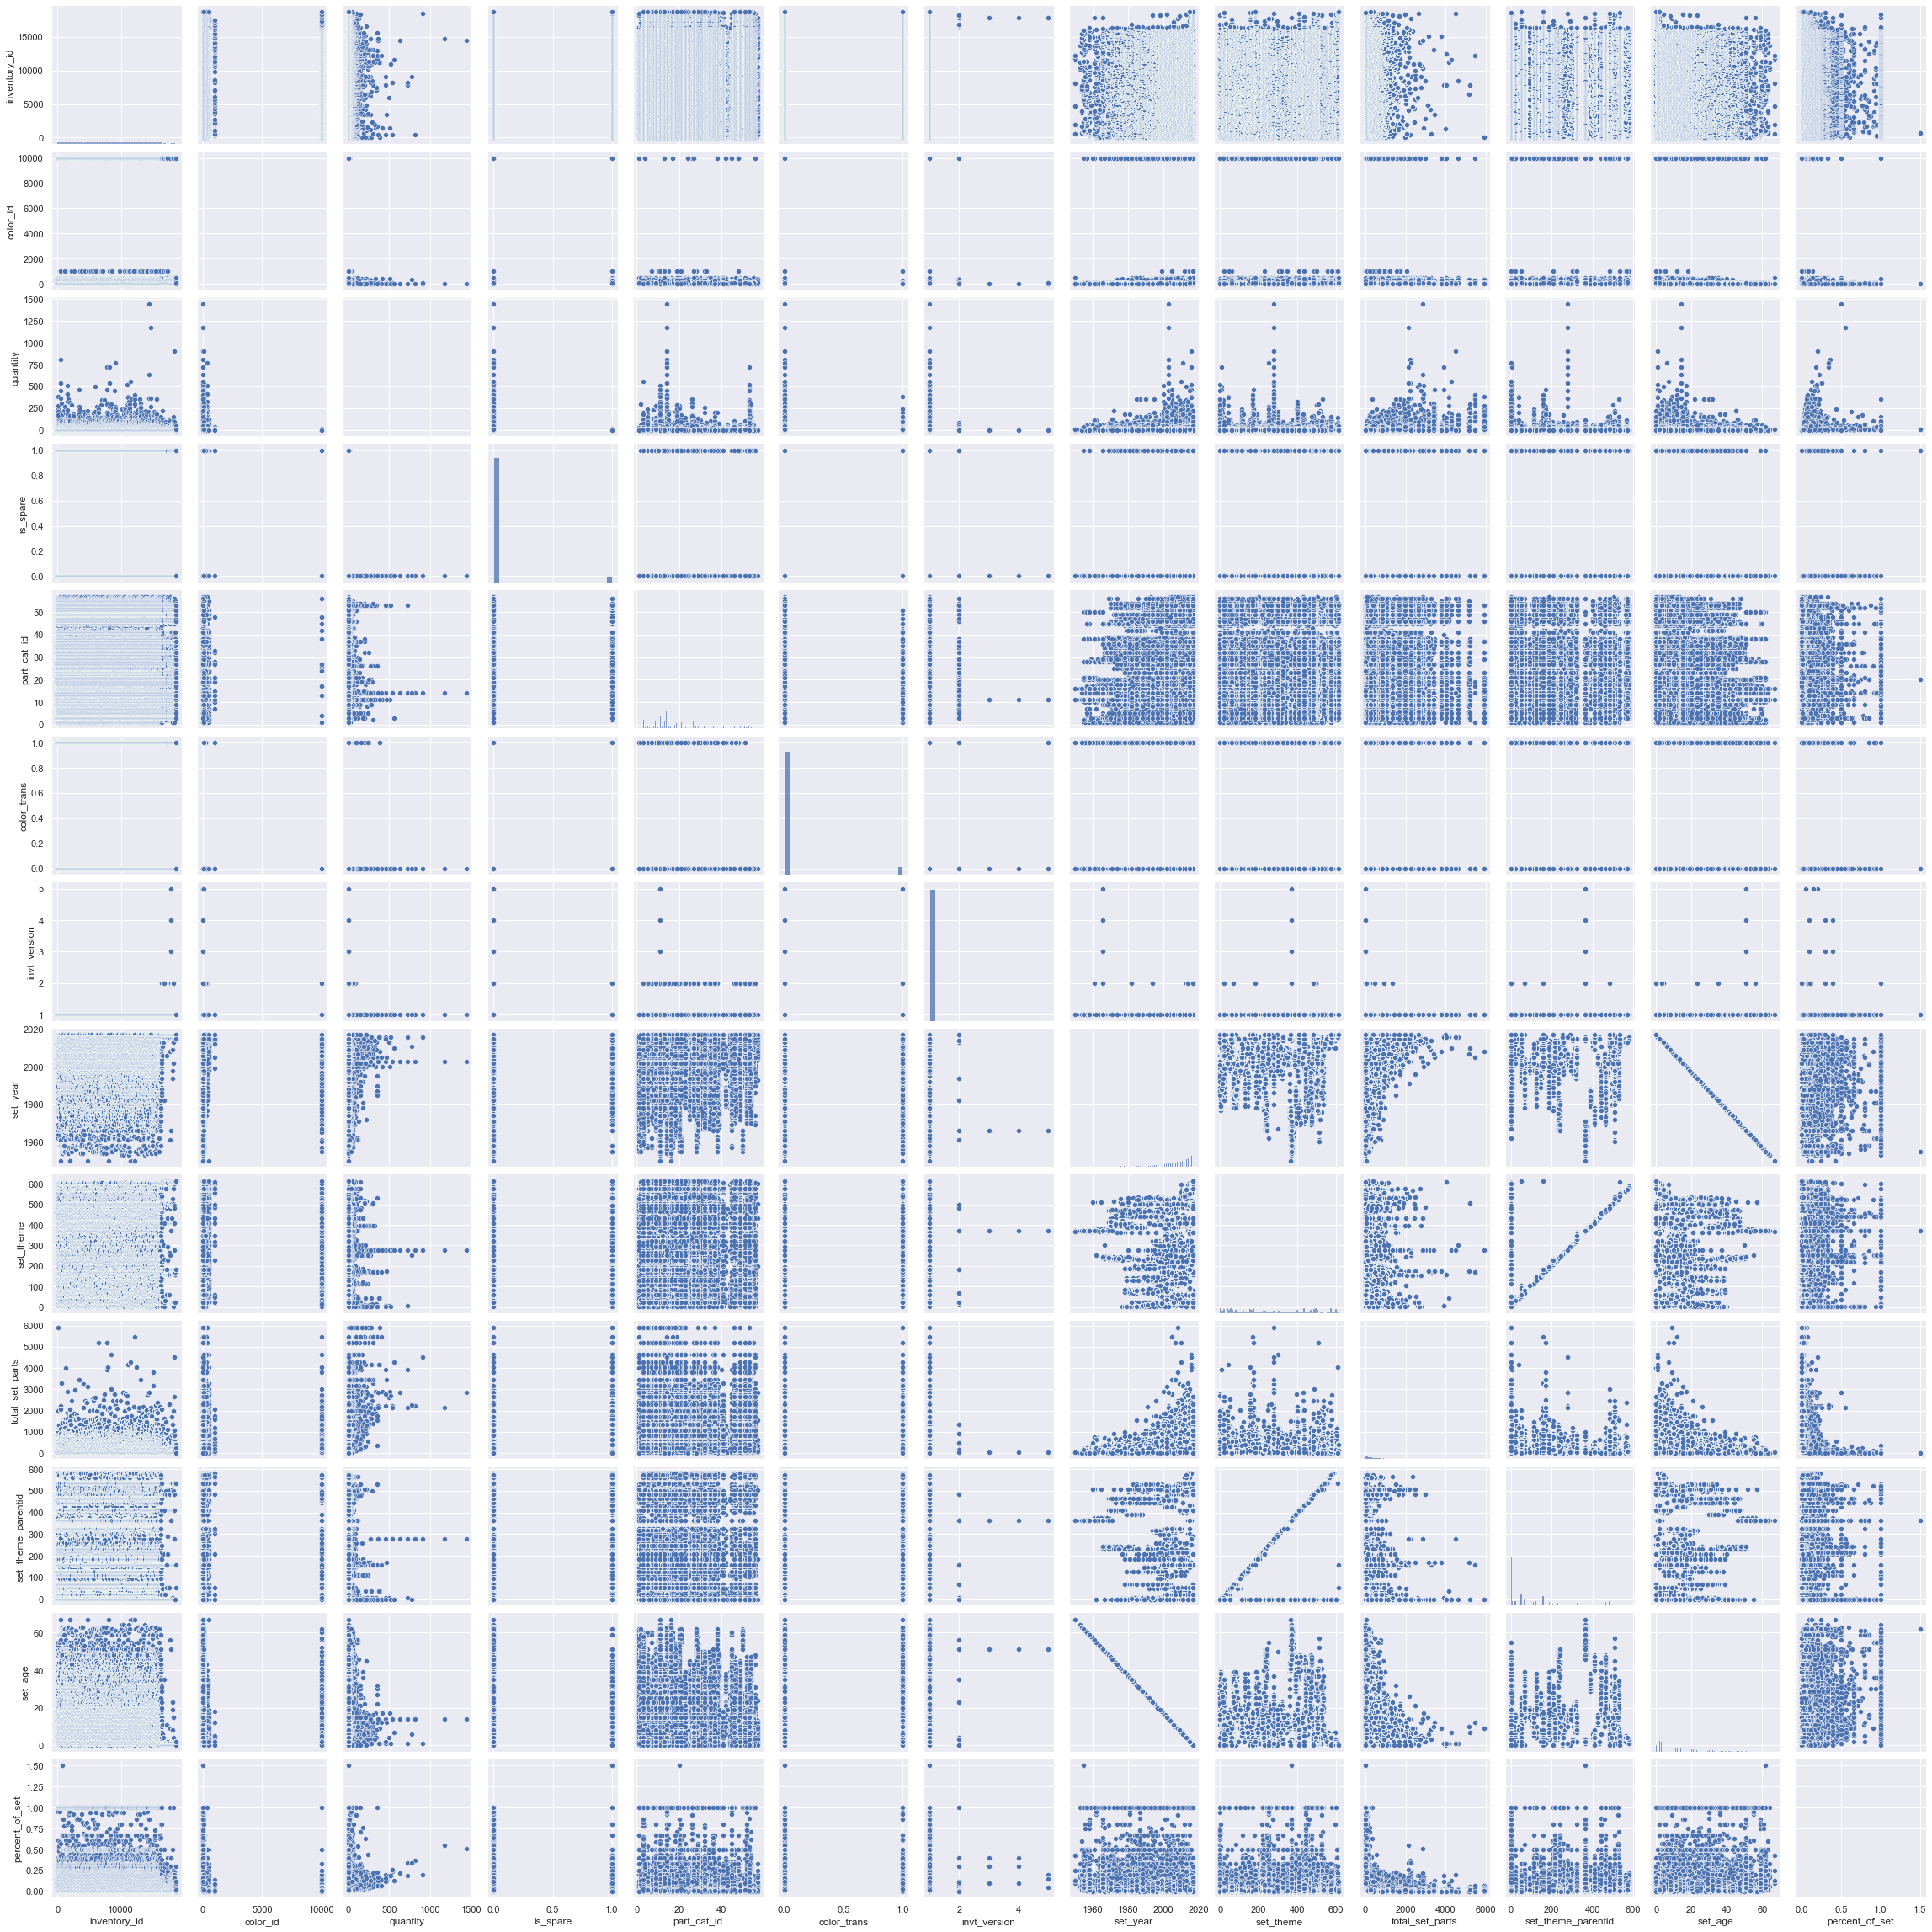

In [22]:
sns.pairplot(legos);

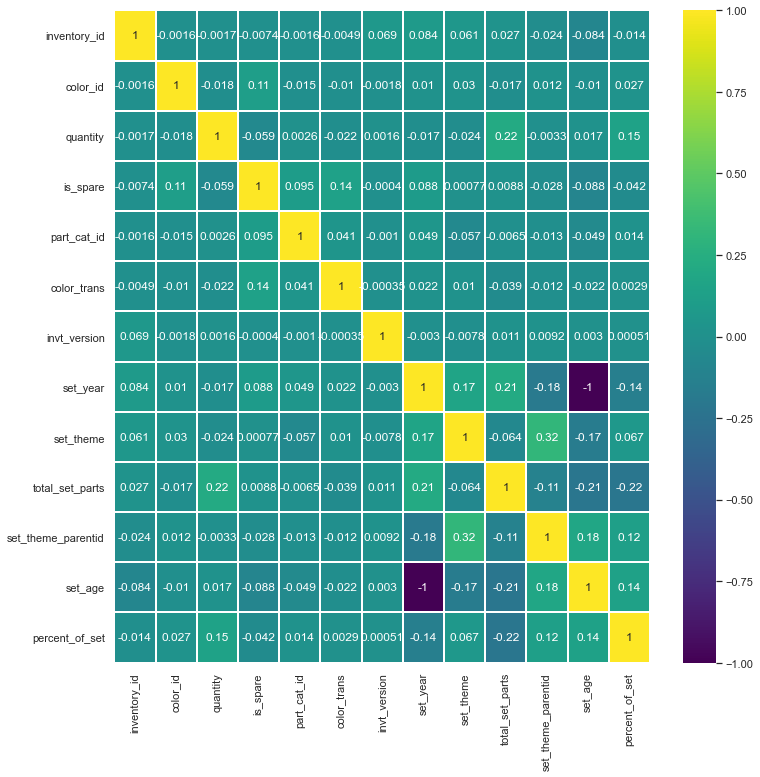

In [23]:
plt.figure(figsize = (12, 12))

sns.heatmap(legos.corr(),
            vmin = -1,
            vmax = 1,
            cmap = 'viridis',
            annot = True,
            linewidths = 1);

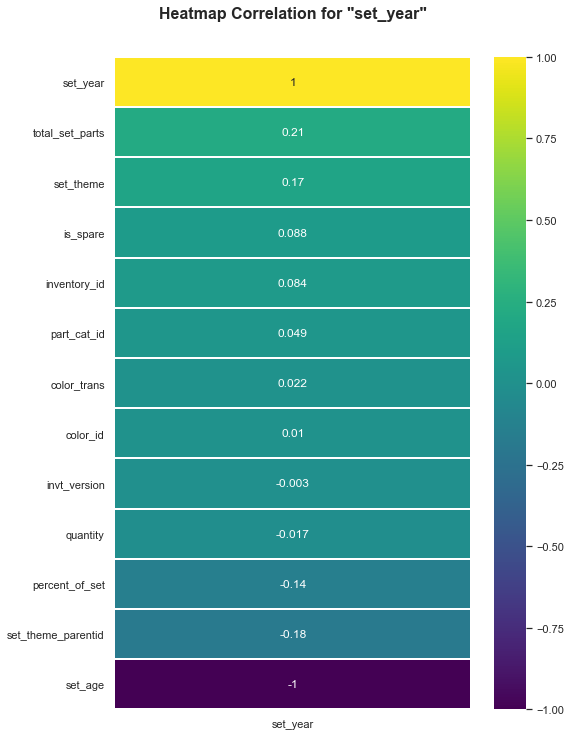

In [24]:
plt.figure(figsize = (8, 12))

sns.heatmap(legos.corr()[['set_year']].sort_values('set_year', ascending = False),
            vmin = -1,
            vmax = 1,
            annot = True,
            linewidths = 1,
            cmap='viridis')

plt.title('Heatmap Correlation for "set_year"',
         fontsize = 16,
         fontweight = 'bold',
         y = 1.05);

In [25]:
legos['part_name'].nunique()

22942

In [26]:
legos['part_num'].nunique()

23114

In [27]:
legos['set_name'].nunique()

9457

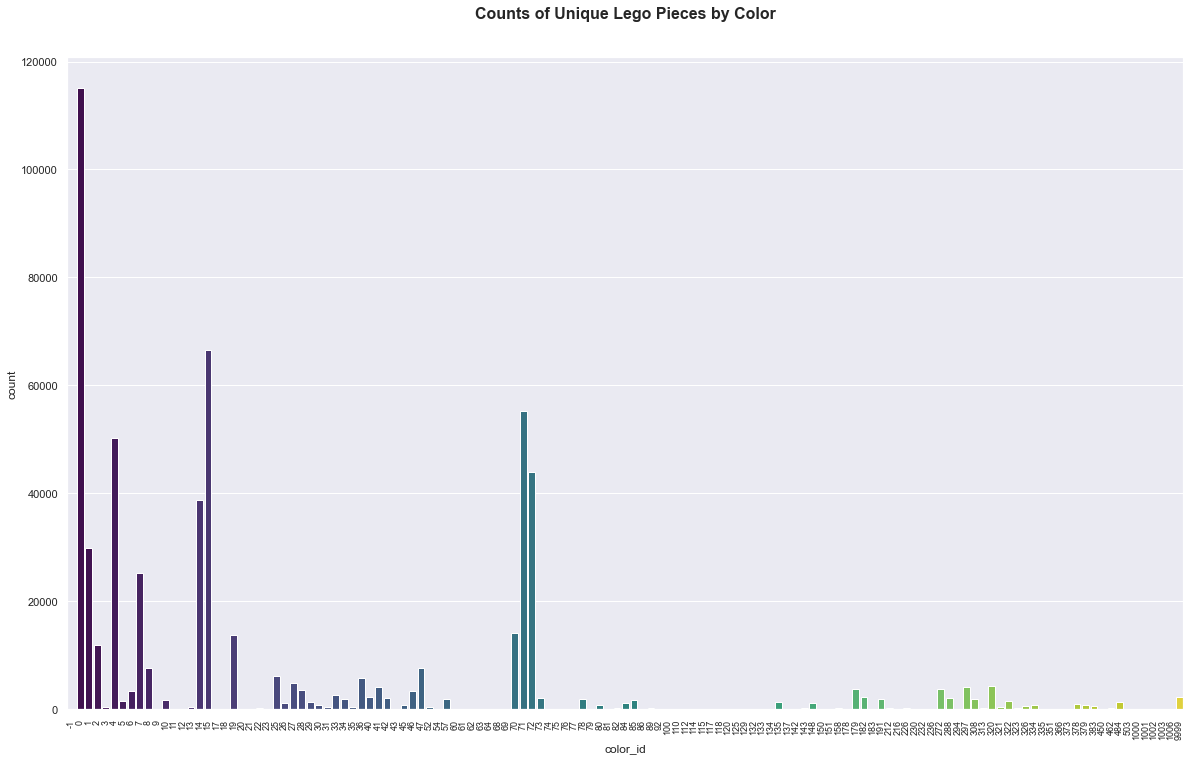

In [28]:
plt.figure(figsize = (20, 12))

sns.countplot(x = 'color_id',
              data = legos,
              palette = 'viridis')

plt.title('Counts of Unique Lego Pieces by Color',
          fontsize = 16, 
          fontweight = 'bold',
          y = 1.05)
plt.xticks(fontsize = 9, 
           rotation = 90);

In [29]:
most_pop_colors = legos['color_id'].value_counts()[0:10].index
most_pop_colors

Int64Index([0, 15, 71, 4, 72, 14, 1, 7, 70, 19], dtype='int64')

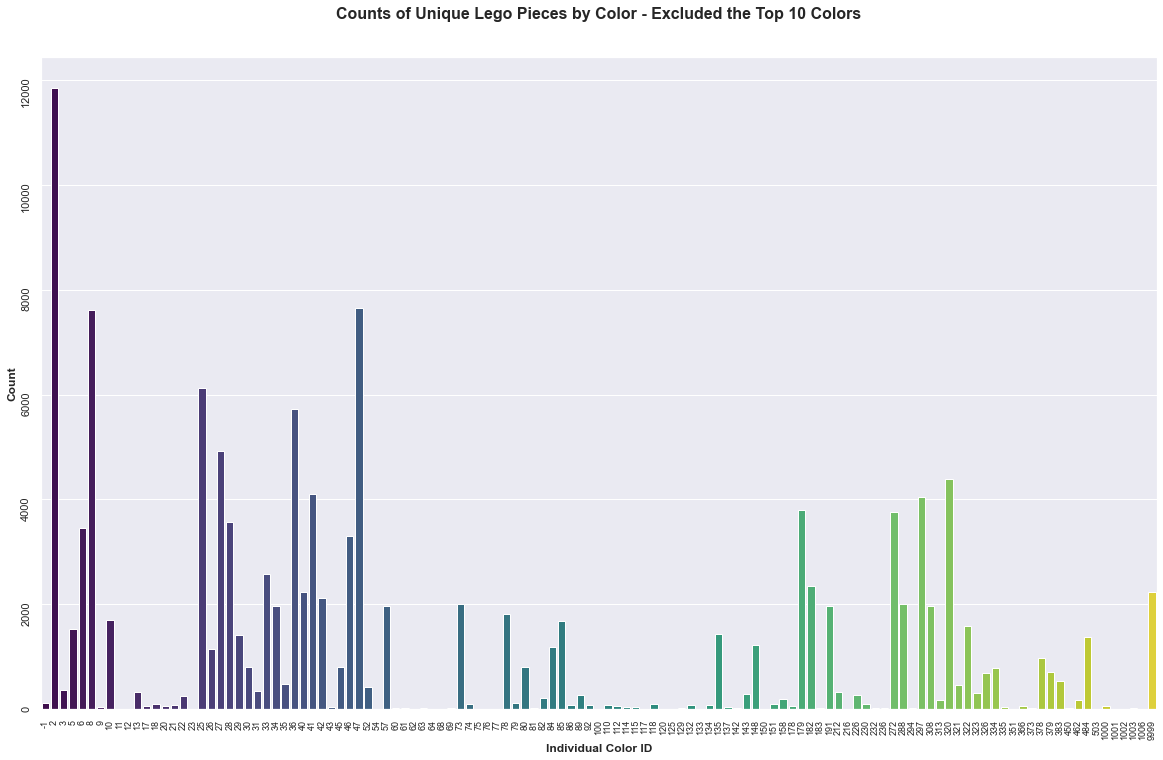

In [30]:
plt.figure(figsize = (20, 12))

sns.countplot(x = 'color_id',
              data = legos[-legos['color_id'].isin(most_pop_colors)],
              palette = 'viridis')

plt.title('Counts of Unique Lego Pieces by Color - Excluded the Top 10 Colors',
          fontsize = 16, 
          fontweight = 'bold', 
          y = 1.05)

plt.xticks(fontsize = 9,
           rotation = 90)
plt.xlabel('Individual Color ID',
          fontweight = 'bold')

plt.yticks(rotation = 90)
plt.ylabel('Count',
          fontweight = 'bold');

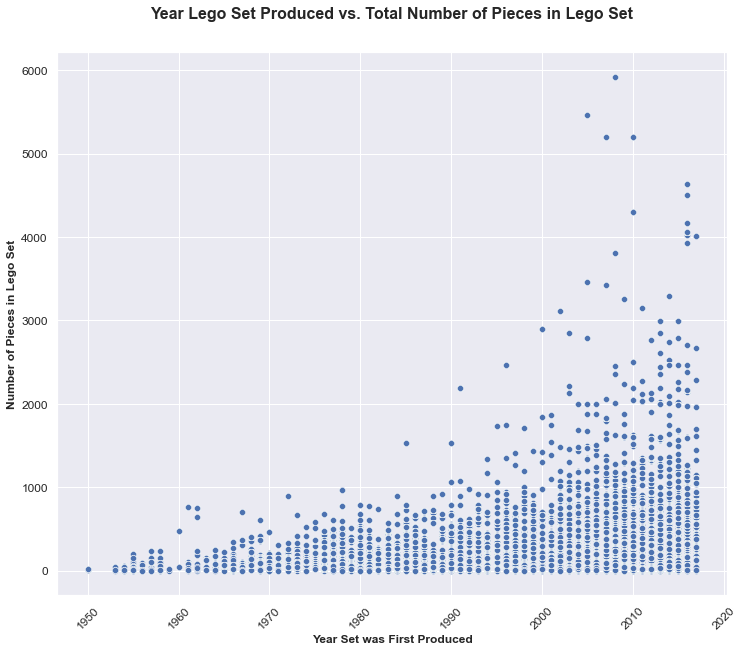

In [31]:
#NEED TO RENAME #NEED TO RENAME #NEED TO RENAME 
#NEED TO RENAME #NEED TO RENAME #NEED TO RENAME
#NEED TO RENAME #NEED TO RENAME #NEED TO RENAME

plt.figure(figsize = (12, 10))

sns.scatterplot(x = legos['set_year'],
                y = legos['total_set_parts'])

plt.title('Year Lego Set Produced vs. Total Number of Pieces in Lego Set',
         fontsize = 16,
         fontweight = 'bold',
         y = 1.05)

plt.xlabel('Year Set was First Produced',
          fontweight = 'bold')
plt.xticks(rotation = 45)

plt.ylabel('Number of Pieces in Lego Set',
          fontweight = 'bold')

plt.tick_params(labelsize = 12)

plt.show();

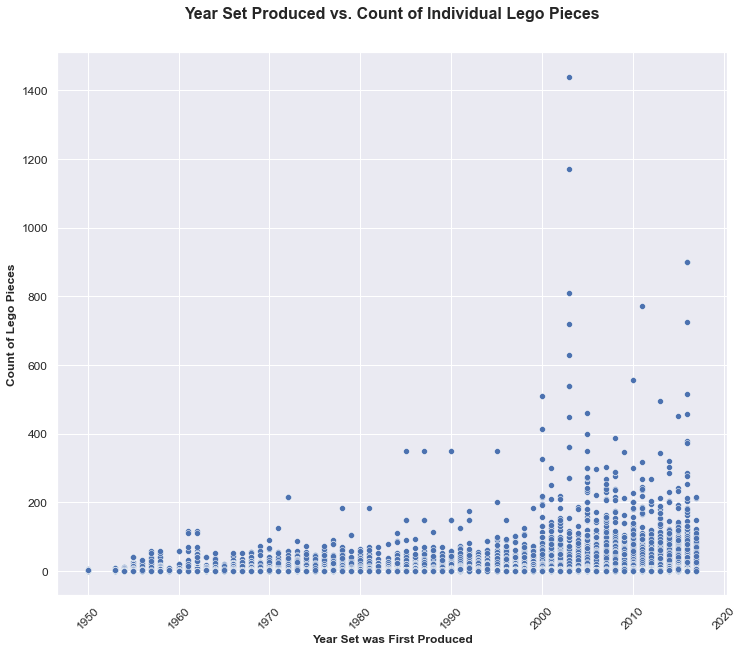

In [32]:
#NEED TO RENAME #NEED TO RENAME #NEED TO RENAME 
#NEED TO RENAME #NEED TO RENAME #NEED TO RENAME
#NEED TO RENAME #NEED TO RENAME #NEED TO RENAME

plt.figure(figsize = (12, 10))

sns.scatterplot(x = 'set_year',
                y = 'quantity',
                data = legos);

plt.title('Year Set Produced vs. Count of Individual Lego Pieces',
         fontsize = 16,
         fontweight = 'bold',
         y = 1.05)

plt.xlabel('Year Set was First Produced',
          fontweight = 'bold')
plt.xticks(rotation = 45)

plt.ylabel('Count of Lego Pieces',
          fontweight = 'bold')

plt.tick_params(labelsize = 12)

plt.show();

In [33]:
#observing the lego set where there's an instance of quantity > 1,400:

legos[legos['quantity'] > 1400]

,inventory_id,part_num,color_id,quantity,is_spare,part_name,part_cat_id,color_trans,invt_version,set_name,set_year,set_theme,total_set_parts,set_theme_parentid,set_age,percent_of_set
492590,14469,3024,15,1440,0,Plate 1 x 1,14,0,1,Lego Mosaic Dino,2003,277,2846,276,14,0.505973


In [34]:
legos[legos['inventory_id'] == 14469]
#https://www.bricklink.com/v2/catalog/catalogitem.page?S=k34432-1#T=I

,inventory_id,part_num,color_id,quantity,is_spare,part_name,part_cat_id,color_trans,invt_version,set_name,set_year,set_theme,total_set_parts,set_theme_parentid,set_age,percent_of_set
492587,14469,3022,0,2,0,Plate 2 x 2,14,0,1,Lego Mosaic Dino,2003,277,2846,276,14,0.000703
492588,14469,3024,0,630,0,Plate 1 x 1,14,0,1,Lego Mosaic Dino,2003,277,2846,276,14,0.221363
492589,14469,3024,72,360,0,Plate 1 x 1,14,0,1,Lego Mosaic Dino,2003,277,2846,276,14,0.126493
492590,14469,3024,15,1440,0,Plate 1 x 1,14,0,1,Lego Mosaic Dino,2003,277,2846,276,14,0.505973
492591,14469,3024,71,360,0,Plate 1 x 1,14,0,1,Lego Mosaic Dino,2003,277,2846,276,14,0.126493
492592,14469,3037,0,44,0,Slope 45° 2 x 4,3,0,1,Lego Mosaic Dino,2003,277,2846,276,14,0.015460
492593,14469,3038,0,2,0,Slope 45° 2 x 3,3,0,1,Lego Mosaic Dino,2003,277,2846,276,14,0.000703
492594,14469,3046a,0,6,0,Slope 45° 2 x 2 Double Concave,3,0,1,Lego Mosaic Dino,2003,277,2846,276,14,0.002108
492595,14469,3176,0,1,0,Plate Special 3 x 2 with Hole,9,0,1,Lego Mosaic Dino,2003,277,2846,276,14,0.000351
492596,14469,4186,71,1,0,Baseplate 48 x 48,1,0,1,Lego Mosaic Dino,2003,277,2846,276,14,0.000351


In [35]:
#array of average number of pieces per part-type - by year: 
avg_parts_year = legos.groupby('set_year')['quantity'].mean()
avg_parts_year

set_year
1950    1.543478
1953    3.666667
1954    1.765306
1955    5.378238
1956    2.674699
          ...   
2013    3.193621
2014    3.016953
2015    2.854090
2016    3.109316
2017    2.883912
Name: quantity, Length: 66, dtype: float64

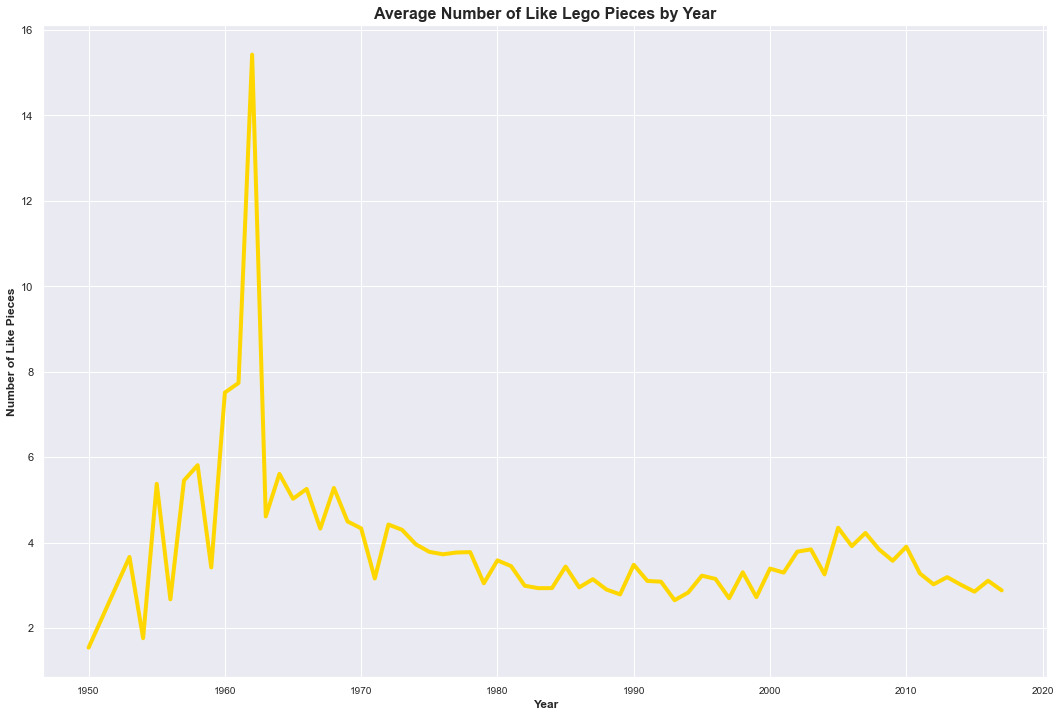

In [36]:
#NEED TO RENAME #NEED TO RENAME #NEED TO RENAME 
#NEED TO RENAME #NEED TO RENAME #NEED TO RENAME
#NEED TO RENAME #NEED TO RENAME #NEED TO RENAME

#plotting:
plt.figure(figsize = (18, 12))

avg_parts_year.plot(color = 'gold',
                    linewidth = 4)

plt.title('Average Number of Like Lego Pieces by Year',
          fontsize = 16,
          fontweight = 'bold')

plt.xlabel('Year',
           fontweight = 'bold')
plt.xticks(fontsize = 10)
plt.ylabel('Number of Like Pieces',
           fontweight = 'bold');

In [37]:
legos[legos['set_year'] == 1962].head()

,inventory_id,part_num,color_id,quantity,is_spare,part_name,part_cat_id,color_trans,invt_version,set_name,set_year,set_theme,total_set_parts,set_theme_parentid,set_age,percent_of_set
3766,99,3023a,14,50,0,Plate 1 x 2 [Old Style Bottom],14,0,1,1 x 1 and 1 x 2 Plates - Yellow (architectural...,1962,252,82,0,55,0.609756
3767,99,3024,14,30,0,Plate 1 x 1,14,0,1,1 x 1 and 1 x 2 Plates - Yellow (architectural...,1962,252,82,0,55,0.365854
3768,99,728,7,1,0,Plate 8 x 11,14,0,1,1 x 1 and 1 x 2 Plates - Yellow (architectural...,1962,252,82,0,55,0.012195
3769,99,729,47,1,0,Container - Box 8 x 11 x 3 Top,7,1,1,1 x 1 and 1 x 2 Plates - Yellow (architectural...,1962,252,82,0,55,0.012195
5155,138,3022,47,40,0,Plate 2 x 2,14,1,1,2 x 2 Plates - Trans-Clear (architectural hobb...,1962,252,42,0,55,0.952381


In [38]:
legos[['quantity']].value_counts()[0:10].sort_index()

quantity
1           239353
2           161772
3            31208
4            62062
5            11448
6            20140
7             5204
8            13719
10            5943
12            4808
dtype: int64

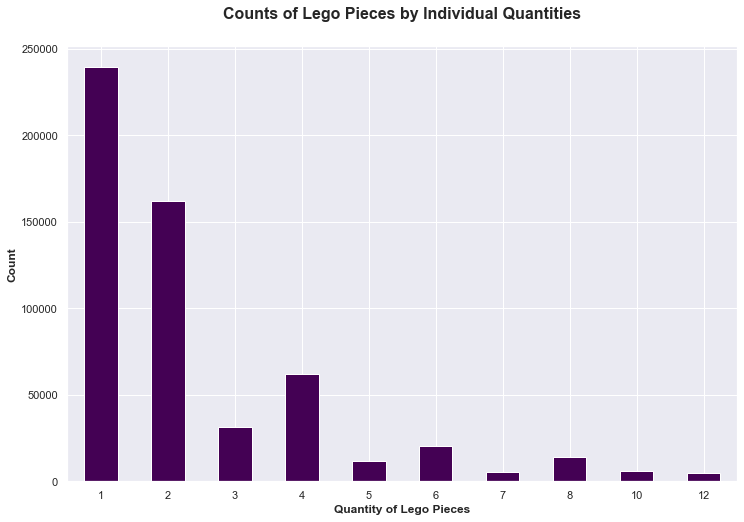

In [39]:
plt.figure(figsize = (12, 8))

legos[['quantity']].value_counts()[0:10].sort_index().plot(kind = 'bar', cmap = 'viridis')

plt.title('Counts of Lego Pieces by Individual Quantities',
         fontsize = 16,
         fontweight = 'bold',
         y = 1.05)

plt.xlabel('Quantity of Lego Pieces',
          fontsize = 12,
          fontweight = 'bold')
plt.xticks(ticks = [0, 1, 2, 3,
                    4, 5, 6, 7,
                    8, 9],
           labels = [1, 2, 3, 4,
                    5, 6, 7, 8,
                    10, 12],
           rotation = 0)

plt.ylabel('Count',
          fontsize = 12,
          fontweight = 'bold')

plt.show();

In [40]:
legos[['quantity']].value_counts()[0:20].sort_index()

quantity
1           239353
2           161772
3            31208
4            62062
5            11448
6            20140
7             5204
8            13719
9             3216
10            5943
11            1957
12            4808
13            1292
14            2395
15             980
16            2496
17             669
18            1309
20            1439
24             829
dtype: int64

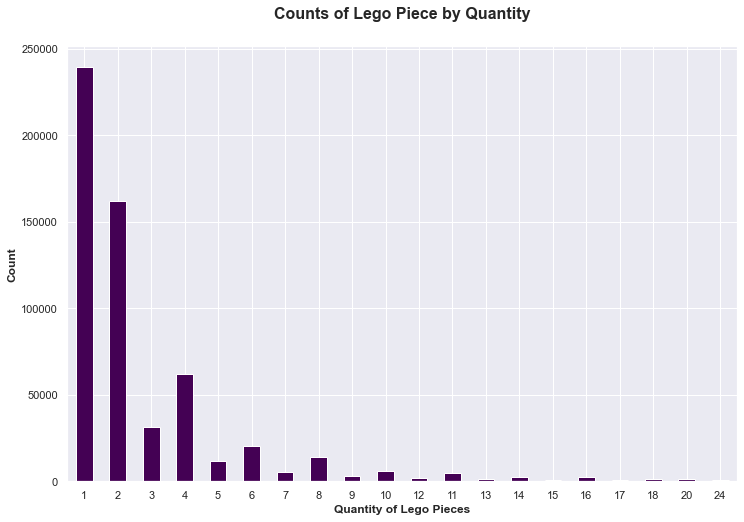

In [41]:
plt.figure(figsize = (12, 8))

legos[['quantity']].value_counts()[0:20].sort_index().plot(kind = 'bar', cmap = 'viridis')

plt.title('Counts of Lego Piece by Quantity',
         fontsize = 16,
         fontweight = 'bold',
         y = 1.05)

plt.xlabel('Quantity of Lego Pieces',
          fontsize = 12,
          fontweight = 'bold')
plt.xticks(ticks = [0, 1, 2, 3,
                    4, 5, 6, 7,
                    8, 9, 10, 11, 
                    12, 13, 14, 15,
                    16, 17, 18, 19],
           labels = [1, 2, 3, 4,
                     5, 6, 7, 8,
                     9, 10, 12, 11,
                     13, 14, 15, 16, 
                     17, 18, 20, 24],
           rotation = 0)

plt.ylabel('Count',
          fontsize = 12,
          fontweight = 'bold')

plt.show();

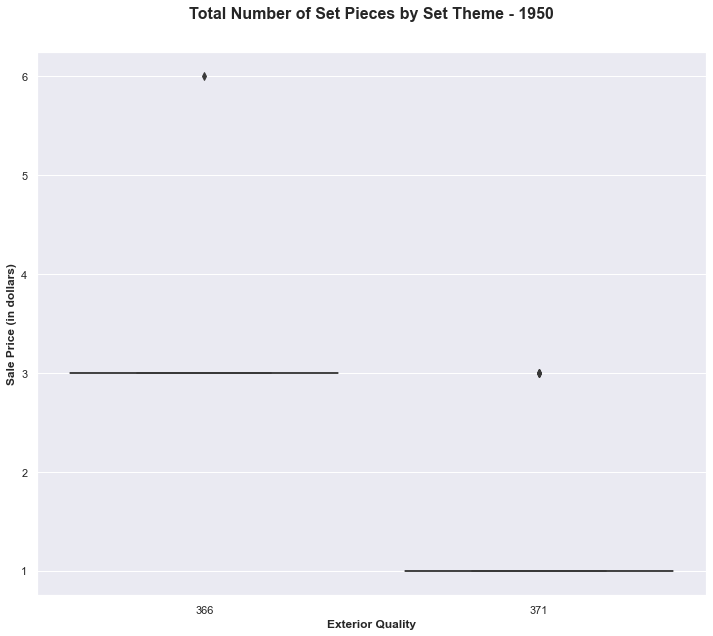

In [42]:
#BAD VISUALIZATION #BAD VISUALIZATION #BAD VISUALIZATION 
#BAD VISUALIZATION #BAD VISUALIZATION #BAD VISUALIZATION 
#BAD VISUALIZATION #BAD VISUALIZATION #BAD VISUALIZATION 

plt.figure(figsize = (12, 10))

sns.boxplot(data = legos[legos['set_year'] == 1950],
            x = 'set_theme',
            y = 'quantity',
            palette = 'viridis')

plt.title('Total Number of Set Pieces by Set Theme - 1950', 
          fontsize = 16,
          fontweight = 'bold',
          y = 1.05)

plt.xlabel('Exterior Quality',
           fontweight = 'bold')

plt.ylabel('Sale Price (in dollars)',
           fontweight = 'bold');

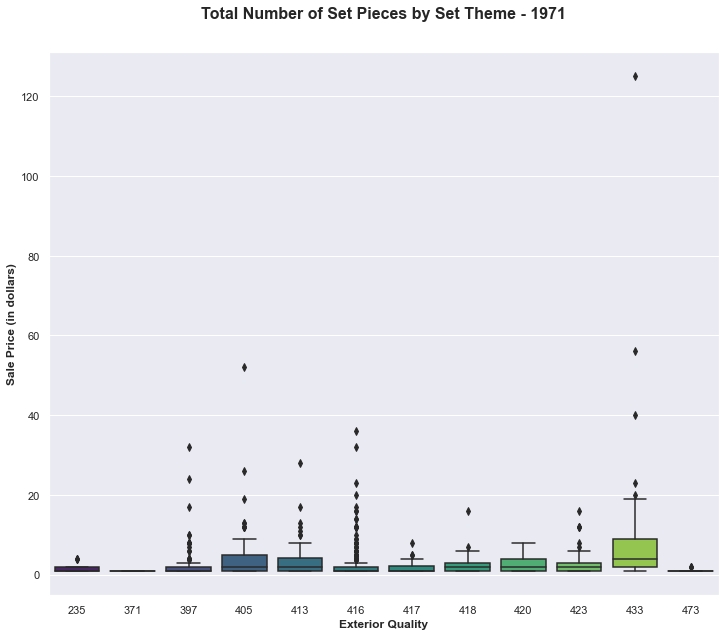

In [43]:
#looking at a random year, 1971:
plt.figure(figsize = (12, 10))

sns.boxplot(data = legos[legos['set_year'] == 1971],
            x = 'set_theme',
            y = 'quantity',
            palette = 'viridis')

plt.title('Total Number of Set Pieces by Set Theme - 1971', 
          fontsize = 16,
          fontweight = 'bold',
          y = 1.05)

plt.xlabel('Exterior Quality',
           fontweight = 'bold')

plt.ylabel('Sale Price (in dollars)',
           fontweight = 'bold');

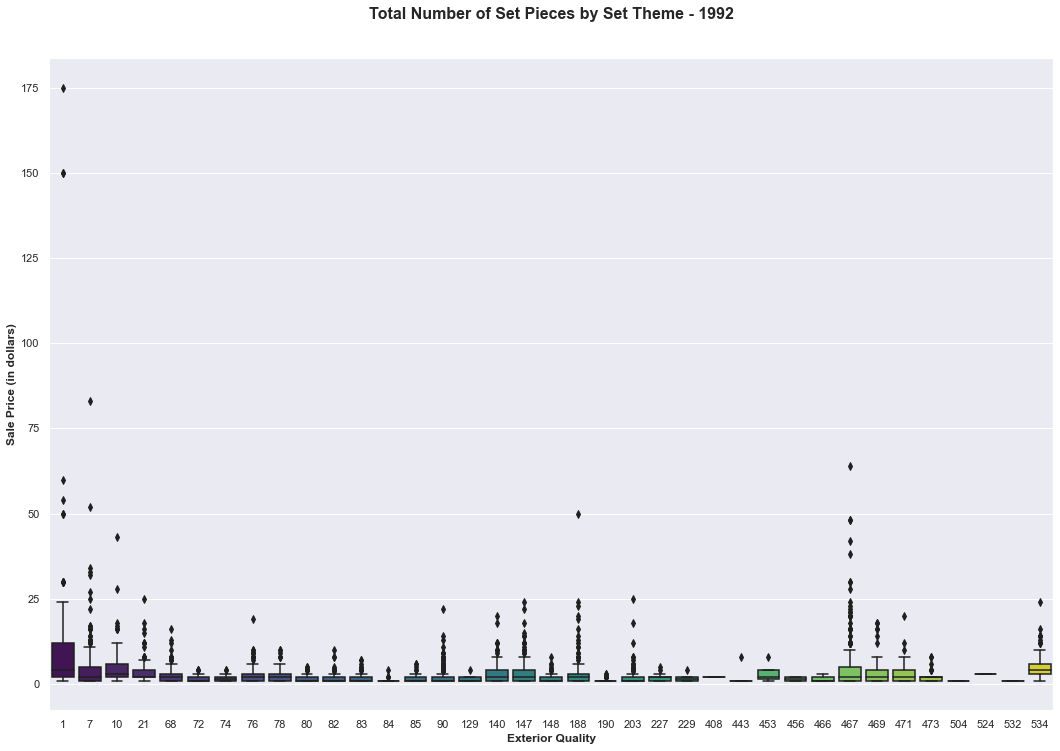

In [44]:
#looking at 1992, the year I was born:
plt.figure(figsize = (18, 12))

sns.boxplot(data = legos[legos['set_year'] == 1992],
            x = 'set_theme',
            y = 'quantity',
            palette = 'viridis')

plt.title('Total Number of Set Pieces by Set Theme - 1992', 
          fontsize = 16,
          fontweight = 'bold',
          y = 1.05)

plt.xlabel('Exterior Quality',
           fontweight = 'bold')
plt.xticks(rotation = 0)

plt.ylabel('Sale Price (in dollars)',
           fontweight = 'bold');

In [45]:
legos.head()

,inventory_id,part_num,color_id,quantity,is_spare,part_name,part_cat_id,color_trans,invt_version,set_name,set_year,set_theme,total_set_parts,set_theme_parentid,set_age,percent_of_set
0,1,48379c01,72,1,0,Sports Promo Figure Base with Feet,27,0,1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,458,13,0.250000
1,1,48395,7,1,0,Sports Promo Snowboard from McDonald's Sports ...,27,0,1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,458,13,0.250000
2,1,mcsport6,25,1,0,Sports Promo Figure Head Torso Assembly McDona...,13,0,1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,458,13,0.250000
3,1,paddle,0,1,0,Sports Promo Paddle from McDonald's Sports Sets,27,0,1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,458,13,0.250000
4,3,11816pr0005,78,1,0,"Minifig Head Modified - Friends - Green Eyes, ...",13,0,1,Emma's Splash Pool,2012,494,43,0,5,0.023256


**Saving Neaten Data to New .csv**

In [46]:
legos.to_csv('../data/lego_pieces_neat.csv', index = False)